In [43]:
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [44]:
train_generator = train_datagen.flow_from_directory(
        'training_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')
test_datagen = ImageDataGenerator(rescale=1./255)


Found 8005 images belonging to 2 classes.


In [45]:
validation_generator = test_datagen.flow_from_directory(
        'test_set',
        target_size=(128, 128),
        batch_size=32,
        class_mode='binary')
cnn_model = tf.keras.models.Sequential()

Found 2023 images belonging to 2 classes.


In [46]:
train_data_dir = 'training_set'
class_names = ['cat', 'dog']  # Corresponding class names for labels

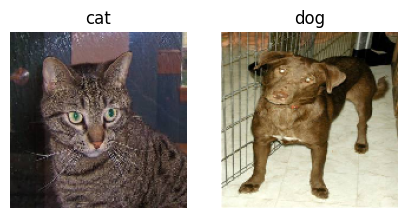

In [48]:
image_files = [os.path.join(train_data_dir, 'cats', filename) for filename in os.listdir(os.path.join(train_data_dir, 'cats'))[:1]] + \
              [os.path.join(train_data_dir, 'dogs', filename) for filename in os.listdir(os.path.join(train_data_dir, 'dogs'))[:1]]

# Display images and labels
plt.figure(figsize=(5, 5))
for i, image_file in enumerate(image_files, 1):
    img = image.load_img(image_file, target_size=(150, 150))  
    img_array = image.img_to_array(img) / 255.0 
    plt.subplot(1, 2, i)
    plt.imshow(img_array)
    plt.title(class_names[i - 1])
    plt.axis('off')

plt.show()

<p style="color: limegreen; background: #00;">Imgage Processing</p>

In [22]:
# convolution layer

cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[128, 128, 3]))

In [23]:
# pooling
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [24]:
cnn_model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn_model.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


In [25]:
# flatten
cnn_model.add(tf.keras.layers.Flatten())

In [26]:
# full connection
cnn_model.add(tf.keras.layers.Dense(units=128, activation='relu'))

In [27]:
# outputlayer
cnn_model.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [28]:
cnn_model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 61, 61, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 28800)             0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [29]:
#compile the model
cnn_model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [30]:
cnn_model.fit(x = train_generator, validation_data = validation_generator, epochs = 10)


Epoch 1/10
251/251 [==============================] - 183s 724ms/step - loss: 0.7096 - accuracy: 0.5580 - val_loss: 0.6673 - val_accuracy: 0.5902
Epoch 2/10
251/251 [==============================] - 131s 521ms/step - loss: 0.6358 - accuracy: 0.6452 - val_loss: 0.6176 - val_accuracy: 0.6713
Epoch 3/10
251/251 [==============================] - 147s 583ms/step - loss: 0.6011 - accuracy: 0.6793 - val_loss: 0.5645 - val_accuracy: 0.7217
Epoch 4/10
251/251 [==============================] - 163s 649ms/step - loss: 0.5689 - accuracy: 0.6994 - val_loss: 0.5368 - val_accuracy: 0.7355
Epoch 5/10
251/251 [==============================] - 175s 694ms/step - loss: 0.5368 - accuracy: 0.7293 - val_loss: 0.5151 - val_accuracy: 0.7459
Epoch 6/10
251/251 [==============================] - 203s 810ms/step - loss: 0.5252 - accuracy: 0.7379 - val_loss: 0.5011 - val_accuracy: 0.7652
Epoch 7/10
251/251 [==============================] - 157s 623ms/step - loss: 0.4946 - accuracy: 0.7568 - val_loss: 0.4881 -

<strong>PREDICTIOIN</strong>

In [36]:
from keras.preprocessing.image import img_to_array, load_img
from keras.preprocessing import image
test_image = image.load_img(r'C:\Users\home\Downloads\archive\predict\dog005.jpg', target_size = (128, 128))
test_image = image.img_to_array(test_image) 
test_image = np.expand_dims(test_image, axis = 0)
result = cnn_model.predict(test_image)


dog


(-0.5, 127.5, 127.5, -0.5)

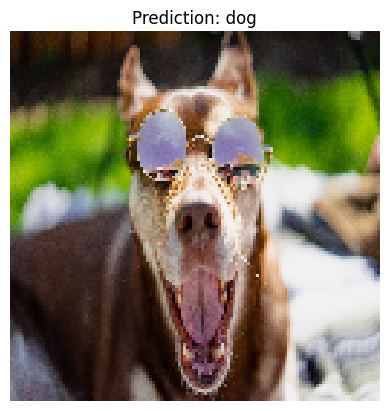

In [37]:
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

print(prediction)





plt.figure()
plt.imshow(image.array_to_img(test_image[0]), interpolation='nearest')  
plt.title("Prediction: " + prediction)
plt.axis('off')
